In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import tweepy
import re

In [2]:
pip install VaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
consumer_key = "jzn0NU9EviCRRbONbUXX9a8VN"
consumer_secret = "ULsKu9BjBPmZ3yY5NdS6EXUhGBNWKUWxtwKqFktBeqsOq1Y3ZQ"
access_key = "781482721-6928Gtnj95bK82PW3fYDxHFvU5T4l3SPI4VVF1X2"
access_secret = "fTxclLJ4oxEmqshRhSbBibGoUiNq1l6941C0VyREdTf41"
    
def initialize():
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth, parser = tweepy.parsers.JSONParser())
    return api
api = initialize()

In [5]:
comp_searches = ("@socialmedia2day", "@GoogleAds", "@Instagram", "@Facebook", "@Twitter")

In [6]:
#This code to find out the trending topic on Twitter. Purpose of use for market research. 
#This satisfies the statistical data for markters, as they are the stakeholders of this project
#referenced from https://python.plainenglish.io/twitter-sentiment-analysis-using-vader-tweepy-b2a62fba151e
#adjusted by changing variables names and accounts to compare statistical data of

In [7]:
# Array to hold sentiment
sentiments = []
# Iterate through all the comp_searches
for search in comp_searches:
       
    # Bring out the 200 tweets
    comp_tweets = api.user_timeline(search, count=200)#counts how many tweets per account in variable comp_search
    #1000 tweets divided by 5 accounts is 200
    #200 counts tweets per account will be iterated as sufficient data amount
    
    # Loop through the most recent 200 tweets
    for tweet in comp_tweets:
        text = tweet["text"]
        
     # Add each value to the appropriate array #
     #pulls Tweets & replies from specified Twitter account
        sentiments.append({"User": search,
                           "text":text, 
                       "Date": tweet["created_at"] 
                        })

In [8]:
#convert array to dataframe
df = pd.DataFrame.from_dict(sentiments)
df.head(1002)#limit is 1000 rows

,User,text,Date
0,@socialmedia2day,Good web safety reminders (via contributor @ir...,Thu Jun 24 00:30:07 +0000 2021
1,@socialmedia2day,A new app promotion opportunity on TikTok http...,Wed Jun 23 23:30:08 +0000 2021
2,@socialmedia2day,A valuable read for Pin marketers https://t.co...,Wed Jun 23 22:45:02 +0000 2021
3,@socialmedia2day,Pinterest continues to grow its international ...,Wed Jun 23 22:15:02 +0000 2021
4,@socialmedia2day,A handy list of all the key dates https://t.co...,Wed Jun 23 21:45:03 +0000 2021
...,...,...,...
994,@Twitter,@salanghaelouis salad in the wind,Tue Mar 02 16:37:36 +0000 2021
995,@Twitter,@sithvers it worked,Tue Mar 02 16:36:35 +0000 2021
996,@Twitter,@CFC_Theo were you manifesting a reply?,Tue Mar 02 16:36:00 +0000 2021
997,@Twitter,@DANVERSFILMS black widow release,Tue Mar 02 16:33:28 +0000 2021


In [9]:
df.to_csv('tweetsentimentanalysis.csv', index=False)

In [10]:
df_saved_file = pd.read_csv('tweetsentimentanalysis.csv')
df_saved_file

,User,text,Date
0,@socialmedia2day,Good web safety reminders (via contributor @ir...,Thu Jun 24 00:30:07 +0000 2021
1,@socialmedia2day,A new app promotion opportunity on TikTok http...,Wed Jun 23 23:30:08 +0000 2021
2,@socialmedia2day,A valuable read for Pin marketers https://t.co...,Wed Jun 23 22:45:02 +0000 2021
3,@socialmedia2day,Pinterest continues to grow its international ...,Wed Jun 23 22:15:02 +0000 2021
4,@socialmedia2day,A handy list of all the key dates https://t.co...,Wed Jun 23 21:45:03 +0000 2021
...,...,...,...
994,@Twitter,@salanghaelouis salad in the wind,Tue Mar 02 16:37:36 +0000 2021
995,@Twitter,@sithvers it worked,Tue Mar 02 16:36:35 +0000 2021
996,@Twitter,@CFC_Theo were you manifesting a reply?,Tue Mar 02 16:36:00 +0000 2021
997,@Twitter,@DANVERSFILMS black widow release,Tue Mar 02 16:33:28 +0000 2021


In [11]:
#to see tweets for specific User name 
df_tesla = df[ df['User'] == '@Twitter']
df_tesla.head()

,User,text,Date
800,@Twitter,@ashakiiii what did they expect...,Tue Jun 22 20:31:56 +0000 2021
801,@Twitter,@GrahamPharoah you need a raise,Tue Jun 22 20:01:08 +0000 2021
802,@Twitter,@DoYouEvenLif we must be related,Tue Jun 22 20:01:03 +0000 2021
803,@Twitter,@dommy254 No.,Tue Jun 22 19:53:41 +0000 2021
804,@Twitter,@dumbfuel thanks?,Tue Jun 22 19:51:15 +0000 2021


In [12]:
#cleaning the tweets
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt
def clean_tweets(tweets):
    #remove twitter Return handles (RT @xxx:)
    tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:") 
    
    #remove twitter handles (@xxx)
    tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
    
    #remove URL links (httpxxx)
    tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    
    #remove special characters, numbers, punctuations (except for #)
    tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")
    
    return tweets

In [13]:
df['text'] = clean_tweets(df['text'])
df['text'].head()

0        Good web safety reminders (via contributor ) 
1           A new app promotion opportunity on TikTok 
2                   A valuable read for Pin marketers 
3    Pinterest continues to grow its international ...
4                   A handy list of all the key dates 
Name: text, dtype: object

In [14]:
scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
for i in range(df['text'].shape[0]):
#print(analyser.polarity_scores(sentiments_pd['text'][i]))
    compound = analyzer.polarity_scores(df['text'][i])["compound"]
    pos = analyzer.polarity_scores(df['text'][i])["pos"]
    neu = analyzer.polarity_scores(df['text'][i])["neu"]
    neg = analyzer.polarity_scores(df['text'][i])["neg"]
    
    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

In [15]:
sentiments_score = pd.DataFrame.from_dict(scores)
df = df.join(sentiments_score)
df.head()

,User,text,Date,Compound,Positive,Negative,Neutral
0,@socialmedia2day,Good web safety reminders (via contributor ),Thu Jun 24 00:30:07 +0000 2021,0.6908,0.533,0.0,0.467
1,@socialmedia2day,A new app promotion opportunity on TikTok,Wed Jun 23 23:30:08 +0000 2021,0.4215,0.318,0.0,0.682
2,@socialmedia2day,A valuable read for Pin marketers,Wed Jun 23 22:45:02 +0000 2021,0.4767,0.383,0.0,0.617
3,@socialmedia2day,Pinterest continues to grow its international ...,Wed Jun 23 22:15:02 +0000 2021,0.0000,0.000,0.0,1.000
4,@socialmedia2day,A handy list of all the key dates,Wed Jun 23 21:45:03 +0000 2021,0.0000,0.000,0.0,1.000


In [16]:
HT_positive = []
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
# extracting hashtags from positive tweetsHT_positive = hashtag_extract(df_tws['text'][df_tws['sent'] == 1])
# extracting hashtags from  tweets
HT_positive = hashtag_extract(df['text'][df['Compound'] > 0.5])
# unnesting list
HT_positive = sum(HT_positive,[])
HT_positive

['SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SMTLive',
 'SmallBusinessWeek',
 'SmallBusinessWeek',
 'ecommerce',
 'GML2021',
 'GoogleIO',
 'GML2021',
 'GoogleAdsTutorials',
 'GoogleIO',
 'WomensHistoryMonth',
 'GoogleForIndia',
 'WomenWill',
 'GoogleAdsTutorials',
 'WomensHistoryMonth',
 'GooglePartners',
 'BlackHistoryMonth',
 'Web',
 'Pride',
 'ShareWithPride',
 'Pride',
 'NationalBestFriendsDay',
 'Pride',
 'Pride',
 'pride',
 'pridefamily',
 'genderfluid',
 'gayvisibility',
 'Pride',
 'Pride',
 'ShareWithPride',
 'TakeABreak',
 'MentalHealthAwarenessMonth',
 'WeeklyFluff',
 'this',
 'MothersDay',
 'MayThe4thBeWithYou',
 'TakeABreak',
 'APIHM',
 'NFLdraft',
 'NationalPetDay',
 'WeeklyFluff',
 'WeeklyFluff',
 'TransDayOfVisibility',
 'JuneTeenth2021',
 'WorldBloodDonorDay',
 'pride',
 'pride',
 'Pride',
 'APAHM',
 'EarthDay',
 'EarthDay'

In [17]:
#Collect the compound values for each news source
score_table = df.pivot_table(index='User',  values="Compound", aggfunc = np.mean)
score_table

,Compound
User,
@Facebook,0.337542
@GoogleAds,0.315106
@Instagram,0.289058
@Twitter,0.130433
@socialmedia2day,0.230866


<AxesSubplot:xlabel='User'>

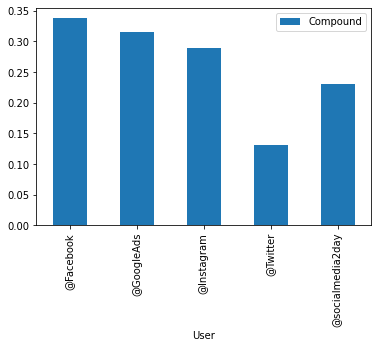

In [18]:
#plotting 
score_table.plot(kind='bar')

<AxesSubplot:xlabel='User'>

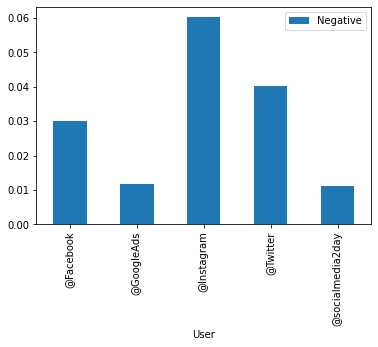

In [19]:
#Collect the negative values for each news source
neg_score_table = df.pivot_table(index='User',  values="Negative", aggfunc = np.mean)
neg_score_table
neg_score_table.plot(kind='bar')

In [20]:
!pip install matplotlib

In [21]:
import matplotlib.pyplot as plt